# **EDA for action_time variable**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
# feature_engineering
import re

# ploting
import matplotlib.pyplot as plt
# model initial:
import statsmodels.api as sm

#sklearn
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Set import folder
input_folder = "kaggle/input/linking-writing-processes-to-writing-quality/"

In [122]:
# Load train logs
train_logs = pd.read_csv(input_folder + "train_logs.csv",delimiter = ",",header = 0)
# Set the id and event id as index:
train_logs_indexed = train_logs.set_index(['id', 'event_id'])
# Load train scores
train_scores = pd.read_csv(input_folder +"train_scores.csv", delimiter = ",", header = 0)
scores = pd.Series(data = train_scores['score'].values, index = train_scores['id'].values, name = 'score')
scores.unique().shape[0]

12

In [4]:
train_logs.head(6)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
5,001519c8,6,107296,107400,104,Input,q,q,q,3,1


In [5]:
train_logs.tail(3)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240
8405897,fff05981,3619,2070065,2070133,68,Input,.,.,.,1029,240


In [6]:
train_logs.shape

(8405898, 11)

In [7]:
train_logs.activity.describe()

count     8405898
unique         50
top         Input
freq      6726796
Name: activity, dtype: object

In [8]:
score_60 = scores[scores == 6.0].index.values
score_05 = scores[scores == 0.5].index.values


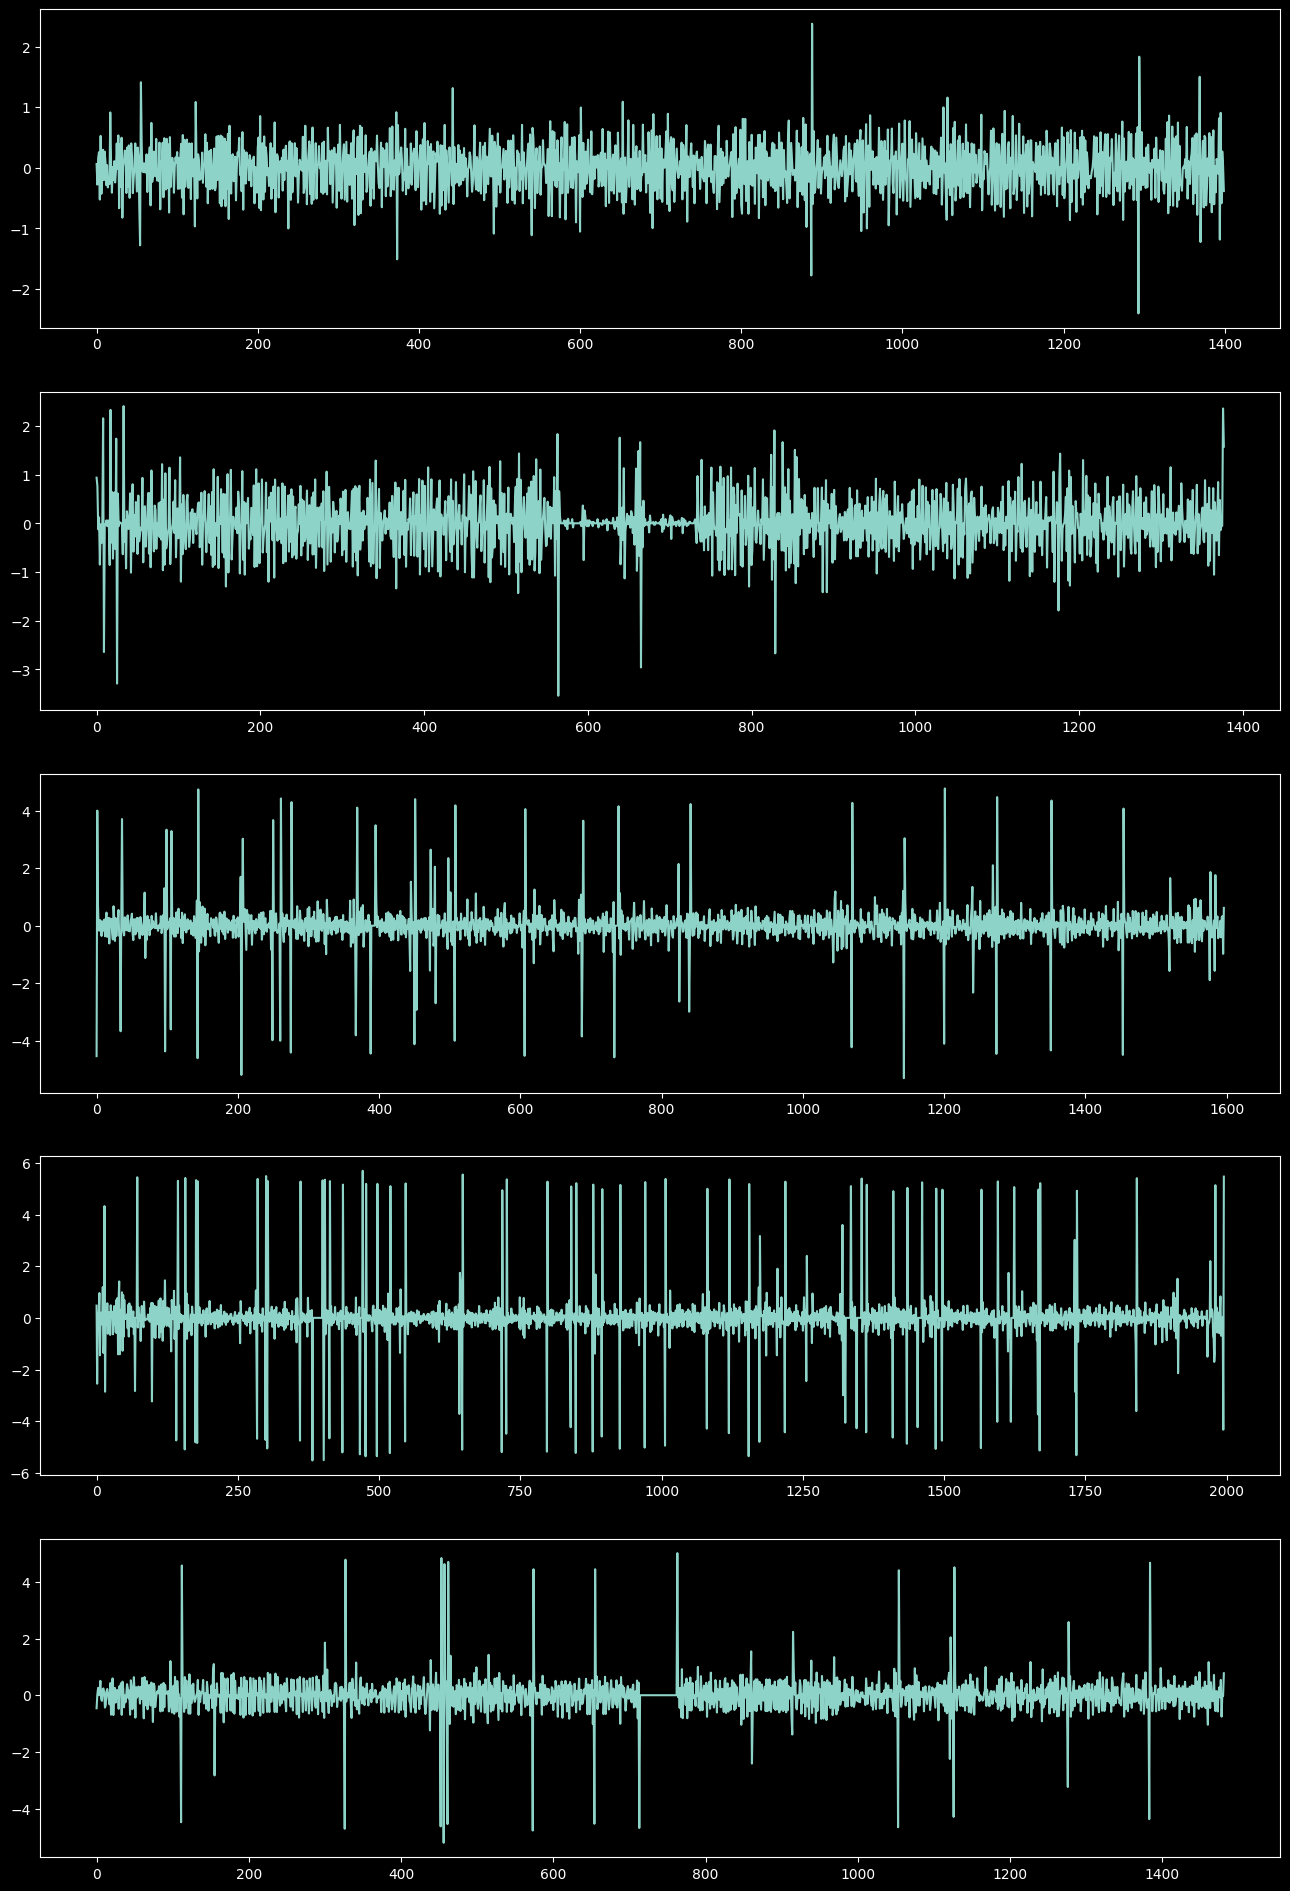

In [9]:
n_plots = 5
plt.style.use('dark_background')
t05 = scores[scores == 0.5].index.values
fig, ax = plt.subplots(figsize = (16, 24), nrows = n_plots) 
for i in range(n_plots):
    ts = train_logs_indexed.loc[t05[i]]['action_time']
    ts = np.diff(np.log(ts + 1))
    ax[i].plot(ts)
plt.show()

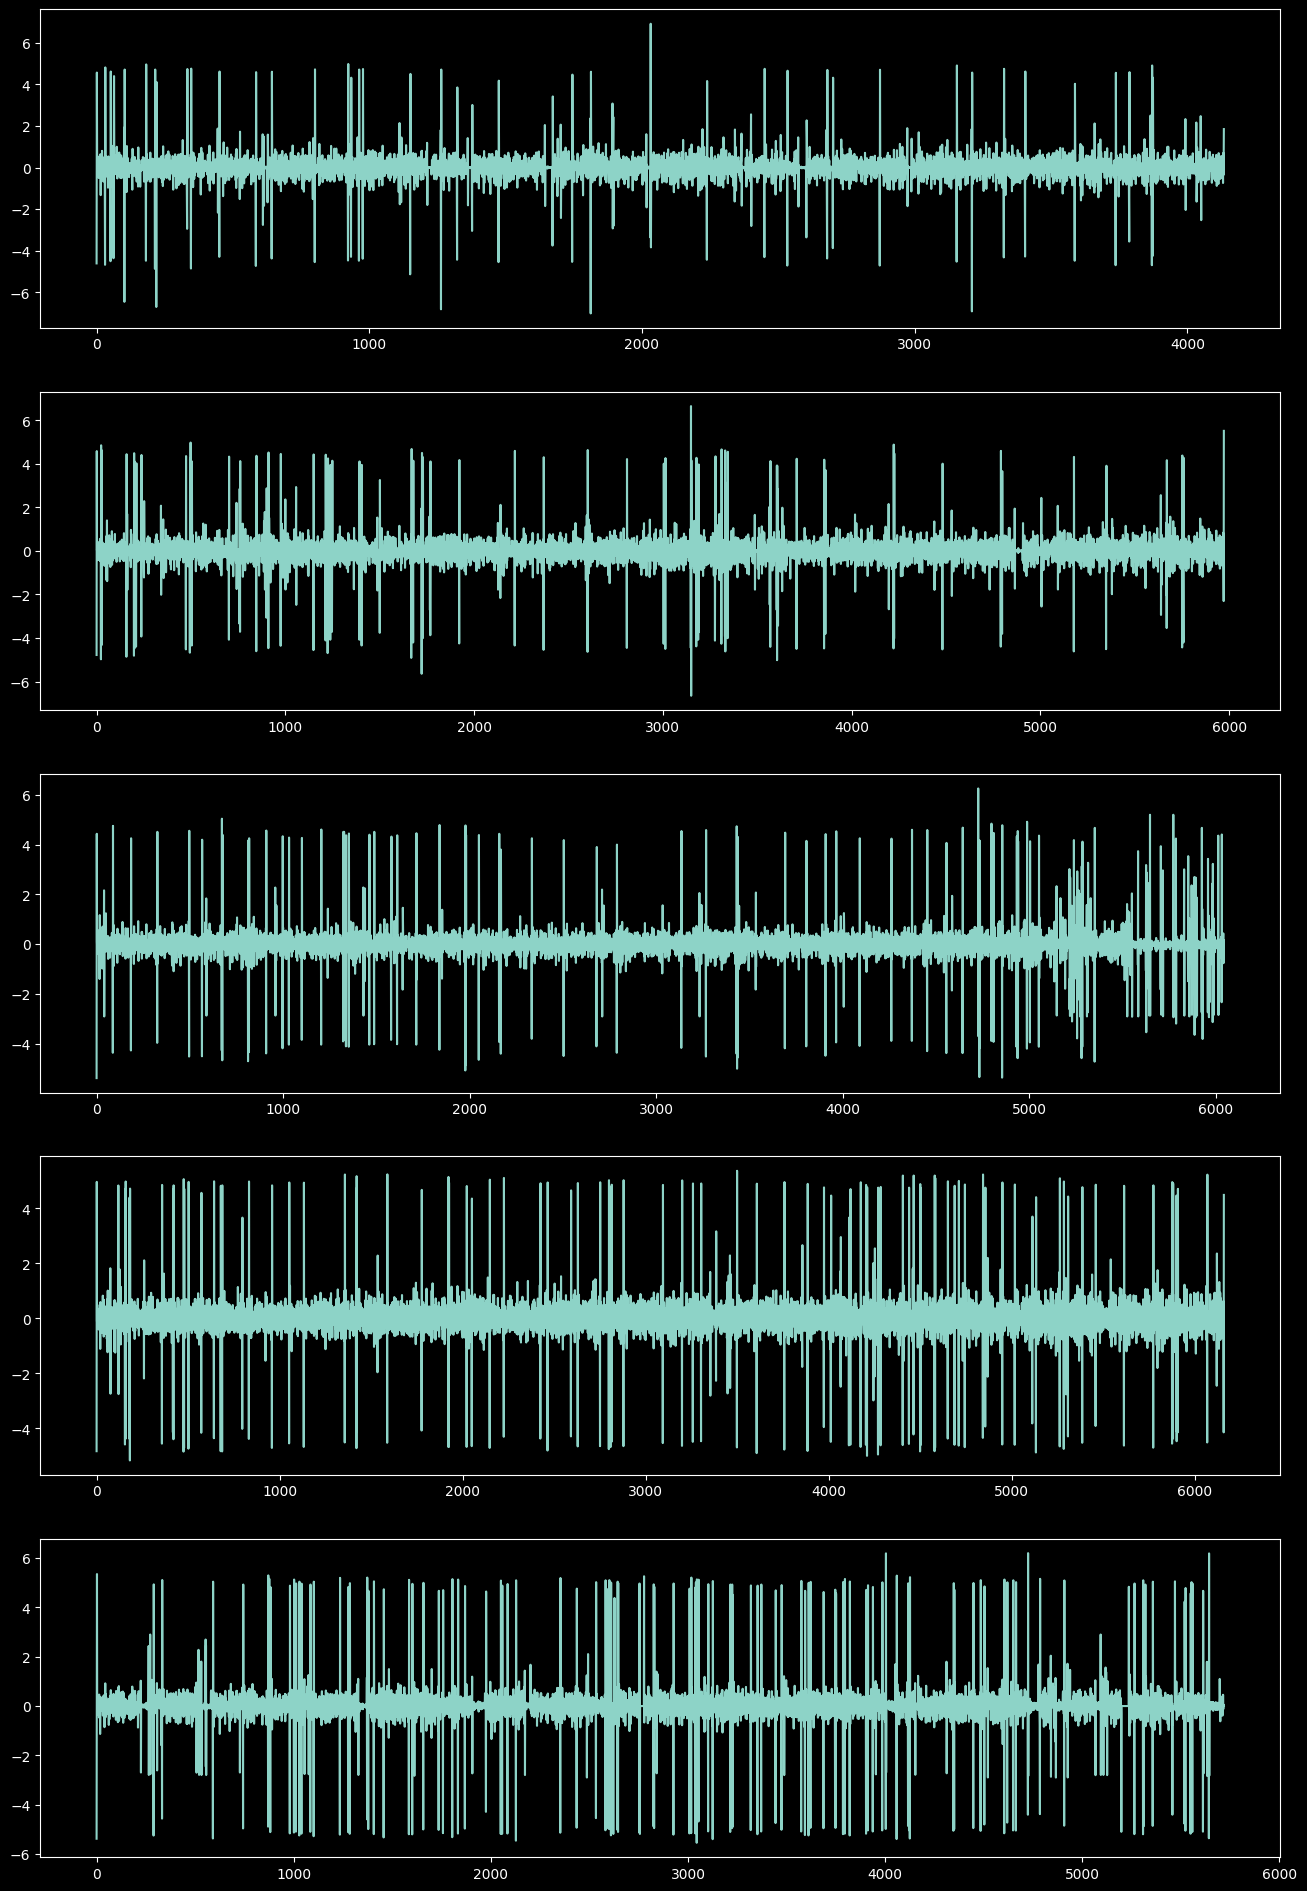

In [10]:
n_plots = 5
plt.style.use('dark_background')
t60 = scores[scores == 6.0].index.values
fig, ax = plt.subplots(figsize = (16, 24), nrows = n_plots) 
for i in range(n_plots):
    ts = train_logs_indexed.loc[t60[i]]['action_time']
    ts = np.diff(np.log(ts + 1))
    ax[i].plot(ts)
    
plt.show()

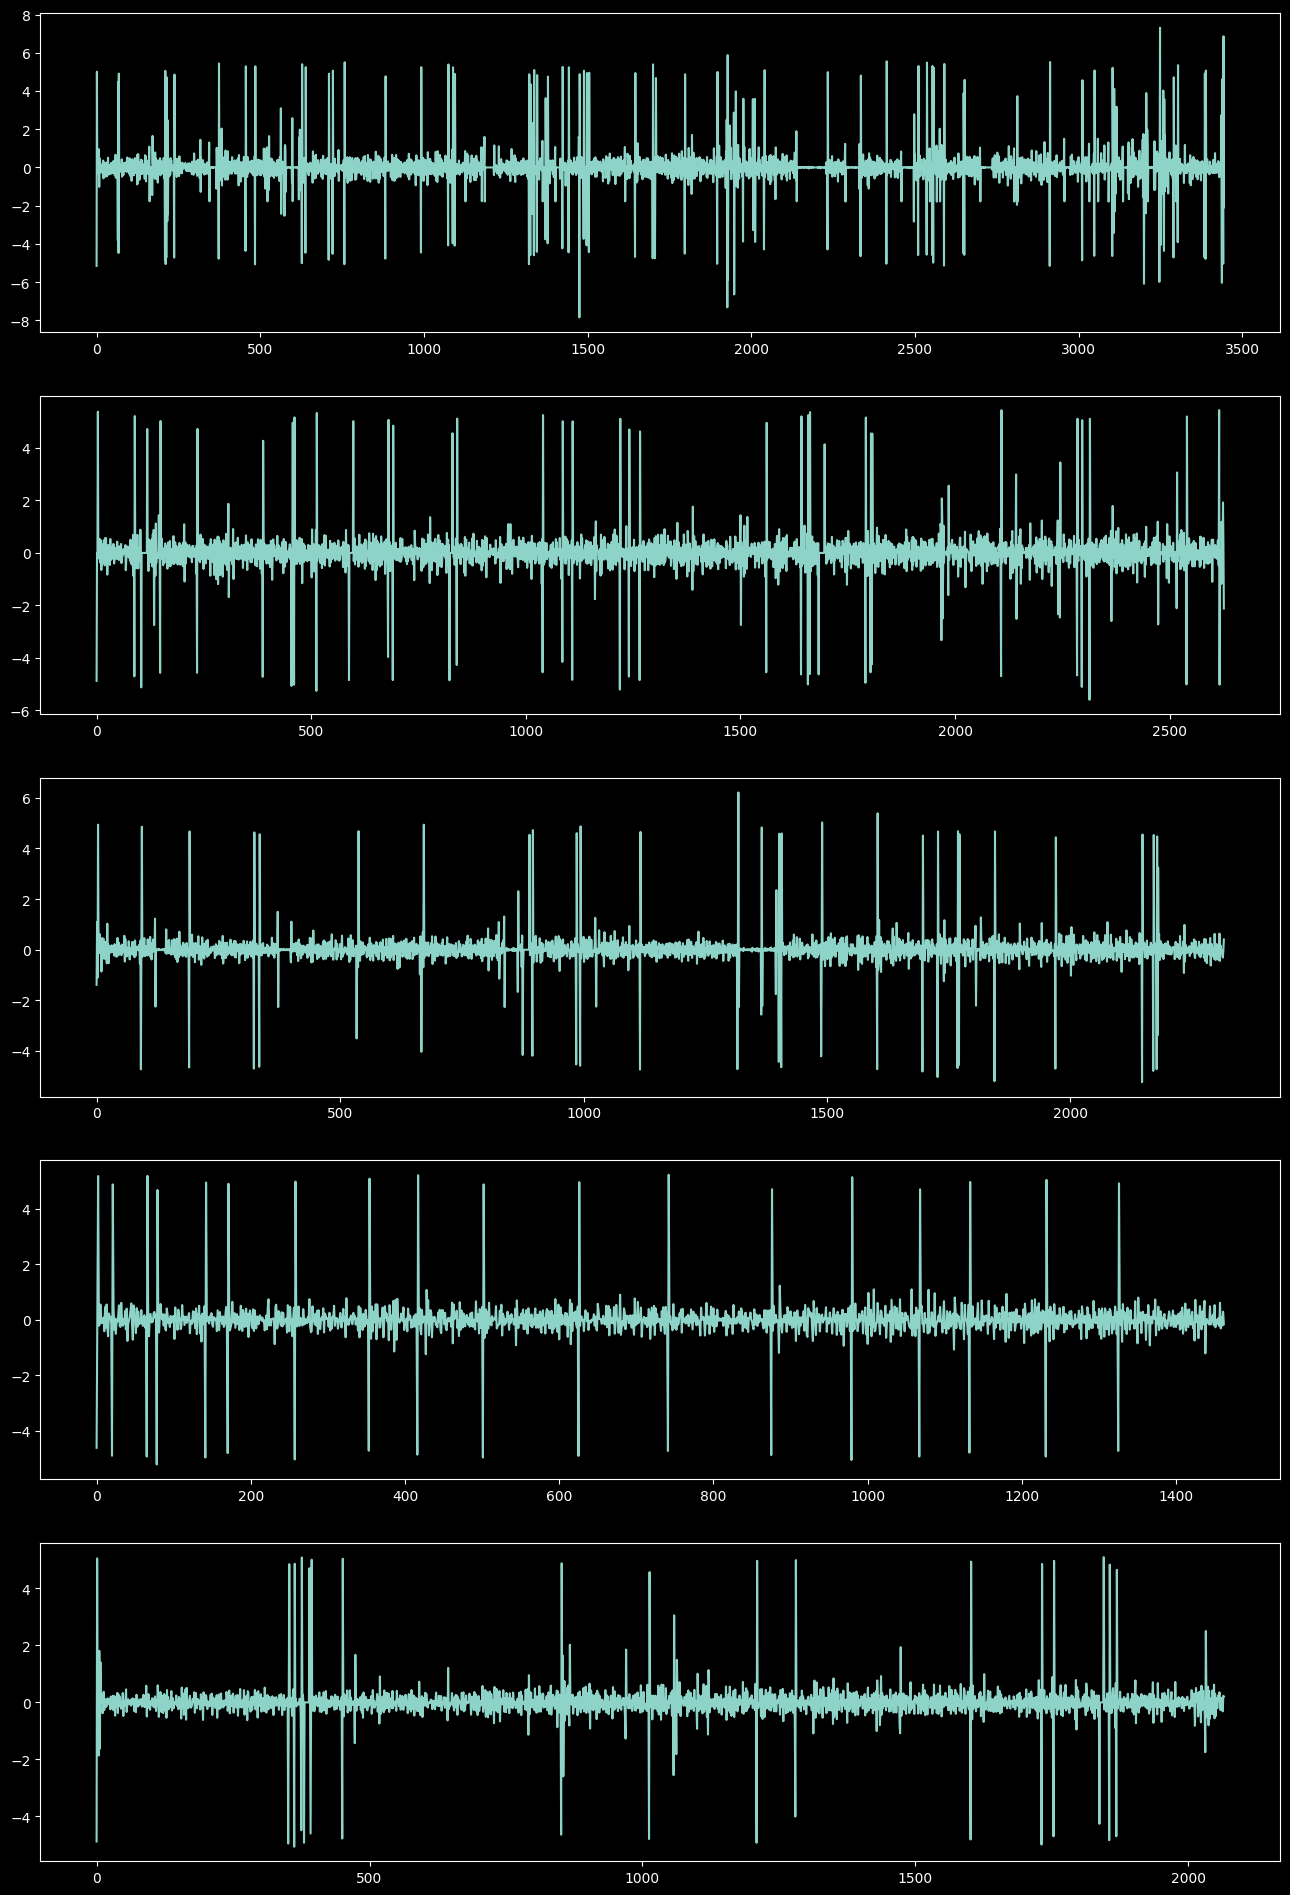

In [11]:
n_plots = 5
plt.style.use('dark_background')
t30 = scores[scores == 3.0].index.values
fig, ax = plt.subplots(figsize = (16, 24), nrows = n_plots) 
for i in range(n_plots):
    ts = train_logs_indexed.loc[t30[i]]['action_time']
    ts = np.diff(np.log(ts + 1))
    ax[i].plot(ts)
plt.show()

In [12]:
# based on the above, check how many have a log of greater than 1, 2, 3 and 4
# The below will check the action_time

def above_log_ratio(x, from_zero = 1):
    z = np.diff(np.log(x+1))
    z = np.abs(z)
    if from_zero < 3:
        count= len(list(filter(lambda q: (q>from_zero -1) and (q < from_zero), z)))
    else:
        count= len(list(filter(lambda q: q>=from_zero, z )))
    return np.log((count+1)/len(z)) 

def above_log_count(x, from_zero = 1):
    z = np.diff(np.log(x+1))
    z = np.abs(z)
    if from_zero < 3:
        count= len(list(filter(lambda q: (q>from_zero -1) and (q < from_zero), z)))
    else:
        count= len(list(filter(lambda q: q>=from_zero, z )))
    return count 

at = train_logs.groupby('id')['action_time'].aggregate([
    ('at_1', lambda x: above_log_ratio(x, from_zero = 1)),
    ('at_2', lambda x: above_log_ratio(x, from_zero = 2)),
    ('at_3', lambda x: above_log_ratio(x, from_zero = 3)),
])

z = pd.merge(at, scores, left_index = True, right_index = True)
z.corr()

,at_1,at_2,at_3,score
at_1,1.000000,-0.250730,-0.335688,0.108167
at_2,-0.250730,1.000000,0.099116,-0.215397
at_3,-0.335688,0.099116,1.000000,0.127055
score,0.108167,-0.215397,0.127055,1.000000


In [128]:
# AT eda 2 distribution check:
# Get the distribution for each kind of score and perform chi-square to detect the score
def above_log_count(x, from_zero = 1):
    z = np.diff(np.log(x+1))
    z = np.abs(z)
    if from_zero < 5:
        count= len(list(filter(lambda q: (q>from_zero -1) and (q < from_zero), z)))
    else:
        count= len(list(filter(lambda q: q>=from_zero, z )))
    return count 


at_init = train_logs.groupby('id')['action_time'].aggregate([
    ('one', lambda x: above_log_count(x, from_zero = 1)),
    ('two', lambda x: above_log_count(x, from_zero = 2)),
    ('three', lambda x: above_log_count(x, from_zero = 3)),
    ('four', lambda x: above_log_count(x, from_zero = 4)),
    ('five', lambda x: above_log_count(x, from_zero = 5)),
])

at2 = pd.merge(at_init, scores, left_index = True, right_index = True)
# print("Score count")
# print(at2.head(3))

# Discriminate based on score:
# print("\n Score count average per log span")
at2 = at2.groupby(by = 'score').sum()
# print(at2)

# Get the proportion:
# print("\n Probability distribution")
at_proportion= at2.apply(lambda x: x/(np.sum(at2, axis = 1)))

# Perform 1 way chi-square test (goodness of fit):
# use at_init since it is the distribution
# xsum = at_init.apply(func = np.sum, axis = 1)
    
# Use chi-square to select the score of the given participant id   
def compute_score_by_chisquare(fo:pd.Series, distribution, stat_location):
    score_values = np.arange(start = 0.5, stop = 6.5, step = 0.5)
    # print(score_values)
    total = np.sum(fo)
    # print(total)
    expected_arrays = distribution * total
    # print(expected_arrays)
    chi_stat = []
    for j in range(expected_arrays.shape[0]):
        results = st.chisquare(f_obs = fo, f_exp = expected_arrays.iloc[j])
        chi_stat.append(results[1])

    chi_stat = np.array(chi_stat)
    # get the maximum p_value
    score_index = np.where(chi_stat == np.partition(chi_stat,stat_location)[stat_location])[0][0]
    return score_values[score_index]




In [147]:
#transform:
at3 = at_init.apply([(lambda x: compute_score_by_chisquare(x, distribution = at_proportion,stat_location = -1)),
      (lambda x: compute_score_by_chisquare(x, distribution = at_proportion,stat_location = -2)),
      (lambda x: compute_score_by_chisquare(x, distribution = at_proportion,stat_location = -3)),
      (lambda x: compute_score_by_chisquare(x, distribution = at_proportion,stat_location = -4))],axis = 1)
at3.columns = ['at1', 'at2', 'at3', 'at4']      

pd.merge(at3, scores, left_index = True, right_index = True).corr()

,at1,at2,at3,at4,score
at1,1.000000,0.380840,0.238595,0.459255,0.162320
at2,0.380840,1.000000,0.236139,0.467932,0.177058
at3,0.238595,0.236139,1.000000,0.326168,0.173673
at4,0.459255,0.467932,0.326168,1.000000,0.203088
score,0.162320,0.177058,0.173673,0.203088,1.000000


In [106]:
k = np.array([1,1,5,3,4,0, 9])
np.partition(k.flatten(), -2)[-2]


5

In [113]:
np.partition(k, -2)

array([1, 1, 0, 3, 4, 5, 9])